In [1]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('..')))

import data_manager as dm
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import IsolationForest

import statsmodels.formula.api as smf

In [2]:
plt.style.use('ggplot')

In [3]:
df = dm.load_data('evraz_data_prprocessed_Anvar.csv')

In [4]:
df = df.drop(columns=['Unnamed: 0', 'ПРОФИЛЬ', 'МАРКА'])
df

,t вып-обр,t обработка,t под током,t продувка,ПСН гр.,чист расход C,чист расход Cr,чист расход Mn,чист расход Si,чист расход V,...,химшлак первый MnO_1,химшлак первый R_1,химшлак первый SiO2_1,химшлак последний Al2O3,химшлак последний CaO,химшлак последний FeO,химшлак последний MgO,химшлак последний MnO,химшлак последний R,химшлак последний SiO2
0,12.0,55.050000,24.700000,54.066667,4.100077,0.403270,0.107350,0.162337,0.087921,0.065261,...,0.15,2.7,22.15,4.25,57.5,0.5,7.7,0.16,2.1,23.972825
1,21.0,47.016667,17.150000,46.666667,3.858443,0.439175,0.114695,0.195510,0.161616,0.064610,...,0.44,2.2,22.15,4.25,57.3,0.6,8.4,0.16,2.2,23.972825
2,21.0,49.700000,27.716667,49.200000,3.346075,0.468640,0.111870,0.203132,0.130141,0.063768,...,0.15,2.3,22.15,4.25,57.3,0.4,9.3,0.14,2.2,23.972825
3,21.0,50.883333,14.850000,50.716667,4.337539,0.449985,0.093225,0.149470,0.105976,0.061966,...,0.14,2.5,22.15,4.25,59.6,0.8,10.1,0.15,2.6,23.972825
4,22.0,47.533333,18.500000,47.366667,3.046576,0.506640,0.102830,0.211246,0.188146,0.062778,...,0.33,2.0,22.15,4.25,57.0,0.5,9.2,0.17,2.1,23.972825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2998,41.0,42.333333,23.200000,42.166667,3.380628,0.537080,0.105640,0.128626,0.101552,0.092195,...,0.10,2.6,22.20,7.00,60.6,0.4,6.2,0.06,2.7,22.800000
2999,36.0,46.533333,16.183333,46.383333,3.040351,0.555875,0.122876,0.156558,0.155113,0.092024,...,0.10,2.2,24.50,4.90,53.0,0.5,11.1,0.25,2.4,22.300000
3000,42.0,47.566667,23.016667,47.100000,2.263004,0.548385,0.111756,0.124018,0.120513,0.093503,...,0.13,2.7,20.00,5.20,55.4,0.7,6.7,0.13,2.2,25.000000
3001,45.0,46.033333,17.533333,45.683333,3.000000,0.601350,0.147896,0.190770,0.154360,0.095110,...,0.18,2.1,24.50,4.90,55.1,0.4,8.9,0.16,2.1,26.000000


In [5]:
def format_string(string):
    K = '_'
    for ele in string: 
        if ele.isdigit() or ele =='-': # and not (ele=='1' or ele=='0'): 
            string = string.replace(ele, K)
        if ele == '.': # and not (ele=='1' or ele=='0'): 
            string = string.replace(ele, '')
    string = string.replace(" ", "_")
    return string


In [6]:
new_column_names = [format_string(nc) for nc in df.columns]
df = df.rename(columns=dict(zip(df.columns, new_column_names)))
df.columns

Index(['t_вып_обр', 't_обработка', 't_под_током', 't_продувка', 'ПСН_гр',
       'чист_расход_C', 'чист_расход_Cr', 'чист_расход_Mn', 'чист_расход_Si',
       'чист_расход_V', 'температура_первая', 'температура_последняя',
       'Ar_(интенс)', 'эл_энергия_(интенс)', 'произв_жидкая_сталь',
       'произв_количество_обработок', 'расход_газ_Ar', 'сыпуч_известь_РП',
       'сыпуч_кокс_пыль_УСТК', 'сыпуч__кокс_мелочь_КМ_', 'сыпуч__шпат_плав',
       'ферспл_CaC_', 'ферспл__FeV___', 'ферспл__Mn_Si__Al__', 'ферспл_SiMn__',
       'ферспл__фх___А', 'эл_энергия', 'химсталь_первый_Al__',
       'химсталь_первый_C__', 'химсталь_первый_Cr__', 'химсталь_первый_Cu__',
       'химсталь_первый_Mn__', 'химсталь_первый_Mo__', 'химсталь_первый_N__',
       'химсталь_первый_Ni__', 'химсталь_первый_P__', 'химсталь_первый_S__',
       'химсталь_первый_Si__', 'химсталь_первый_Ti__', 'химсталь_первый_V__',
       'химсталь_последний_Al', 'химсталь_последний_C',
       'химсталь_последний_Ca', 'химсталь_после

In [7]:
def find_all_column_names_with_first_words(first_words, df):
    similar_column_names = []
    for column_name in df.columns:
        if column_name[0:len(first_words)] == first_words:
            similar_column_names.append(column_name)
    return similar_column_names

def plot_several_scatters_to_find_correlation(x_name, y_names, df):
    ncols=3
    nrows = np.ceil(len(y_names) / ncols).astype(int)
    fig, axes = plt.subplots(ncols=ncols, nrows = nrows, figsize=(7*ncols, 7*nrows), constrained_layout=True)
    axes = axes.flatten()
    pearson_coefs = [df[x_name].corr(df[y_name], method='pearson') for y_name in y_names]
    max_pearson_coef_index = np.argmax(pearson_coefs)

    for i, ax in enumerate(axes):
        if i<len(y_names):
            y_name = y_names[i]
            color = 'r' if i == max_pearson_coef_index else 'b'
            df.plot(kind='scatter',
                    x=x_name,
                    y=y_name,
                    color=color,
                    ax=ax)
            ax.set_title(f'Pearson={pearson_coefs[i]:.2f}')
        else:
            ax.axis("off")
    fig.suptitle(f'{x_name} vs others', fontsize=25)


---------------------------

In [12]:
# целевые переменные
y_cols = ['химшлак последний Al2O3', 
          'химшлак последний CaO', 
          'химшлак последний FeO',
          'химшлак последний MgO',
          'химшлак последний MnO', 
          'химшлак последний R',
          'химшлак последний SiO2']

def show_column_names(df):
    for column_name in df.columns:
        print(column_name)

show_column_names(df)
print(df['МАРКА'].unique())

Unnamed: 0
МАРКА
ПРОФИЛЬ
t вып-обр
t обработка
t под током
t продувка
ПСН гр.
чист расход C
чист расход Cr
чист расход Mn
чист расход Si
чист расход V
температура первая
температура последняя
Ar (интенс.)
эл. энергия (интенс.)
произв жидкая сталь
произв количество обработок
расход газ Ar
сыпуч известь РП
сыпуч кокс пыль УСТК
сыпуч  кокс. мелочь КМ1
сыпуч  шпат плав.
ферспл CaC2
ферспл  FeV-80
ферспл  Mn5Si65Al0.5
ферспл SiMn18
ферспл  фх850А
эл. энергия
химсталь первый Al_1
химсталь первый C_1
химсталь первый Cr_1
химсталь первый Cu_1
химсталь первый Mn_1
химсталь первый Mo_1
химсталь первый N_1
химсталь первый Ni_1
химсталь первый P_1
химсталь первый S_1
химсталь первый Si_1
химсталь первый Ti_1
химсталь первый V_1
химсталь последний Al
химсталь последний C
химсталь последний Ca
химсталь последний Cr
химсталь последний Cu
химсталь последний Mn
химсталь последний Mo
химсталь последний N
химсталь последний Ni
химсталь последний P
химсталь последний S
химсталь последний Si
химсталь после

Процесс, на мой взгляд, выглядит так:

1. Сначала выплавляют чугун, на поверхность которого образуются камни шлака.
2. Берут пробы шлака и чугуна: 'химшлак первый \*' и 'химсталь первый \*' соответственно. С ними делают фазово-химический анализ. Его результаты заполняют в таблицу.
3. Добавляют лигирующие добавки, продувают и т.д. Варят сталь. На ней тоже есть шлак.
4. Из стали забират пробу и из ее шлака. Далают хим анализ. Заполняют колонки 'химшлак последний \*' и 'химсталь последний \*'.

Из процесса можно построить следующие гипотезы:

1. 'химшлак первый \*' и 'химсталь первый \*' - очевидно будут intercept-ами модели.
2. Будет корреляция химшлака с химсталбью для первой и последней пробы.

Попробуем это проверить

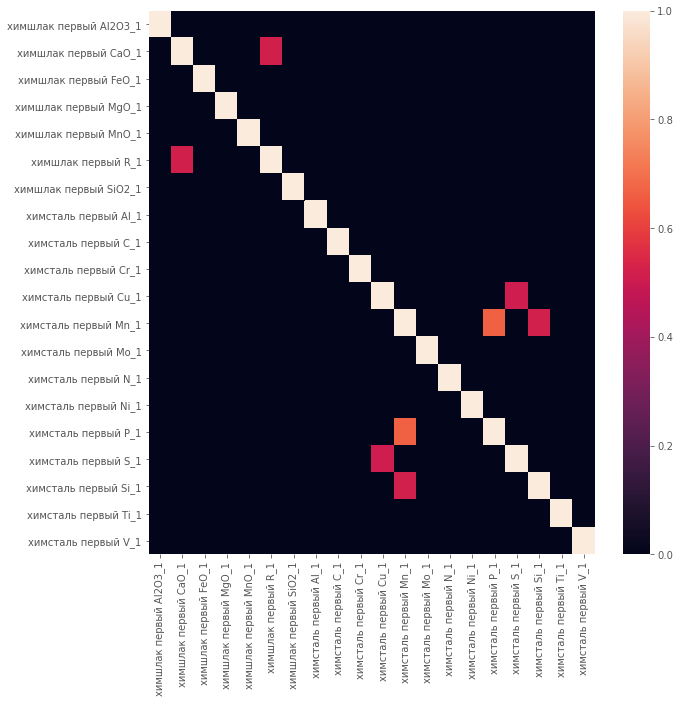

In [14]:
x_names = find_all_column_names_with_first_words('химшлак первый', df)
y_names = find_all_column_names_with_first_words('химсталь первый', df)

corr = df[x_names+y_names].corr(method='pearson') 

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr * (corr>0.5), 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            ax=ax)

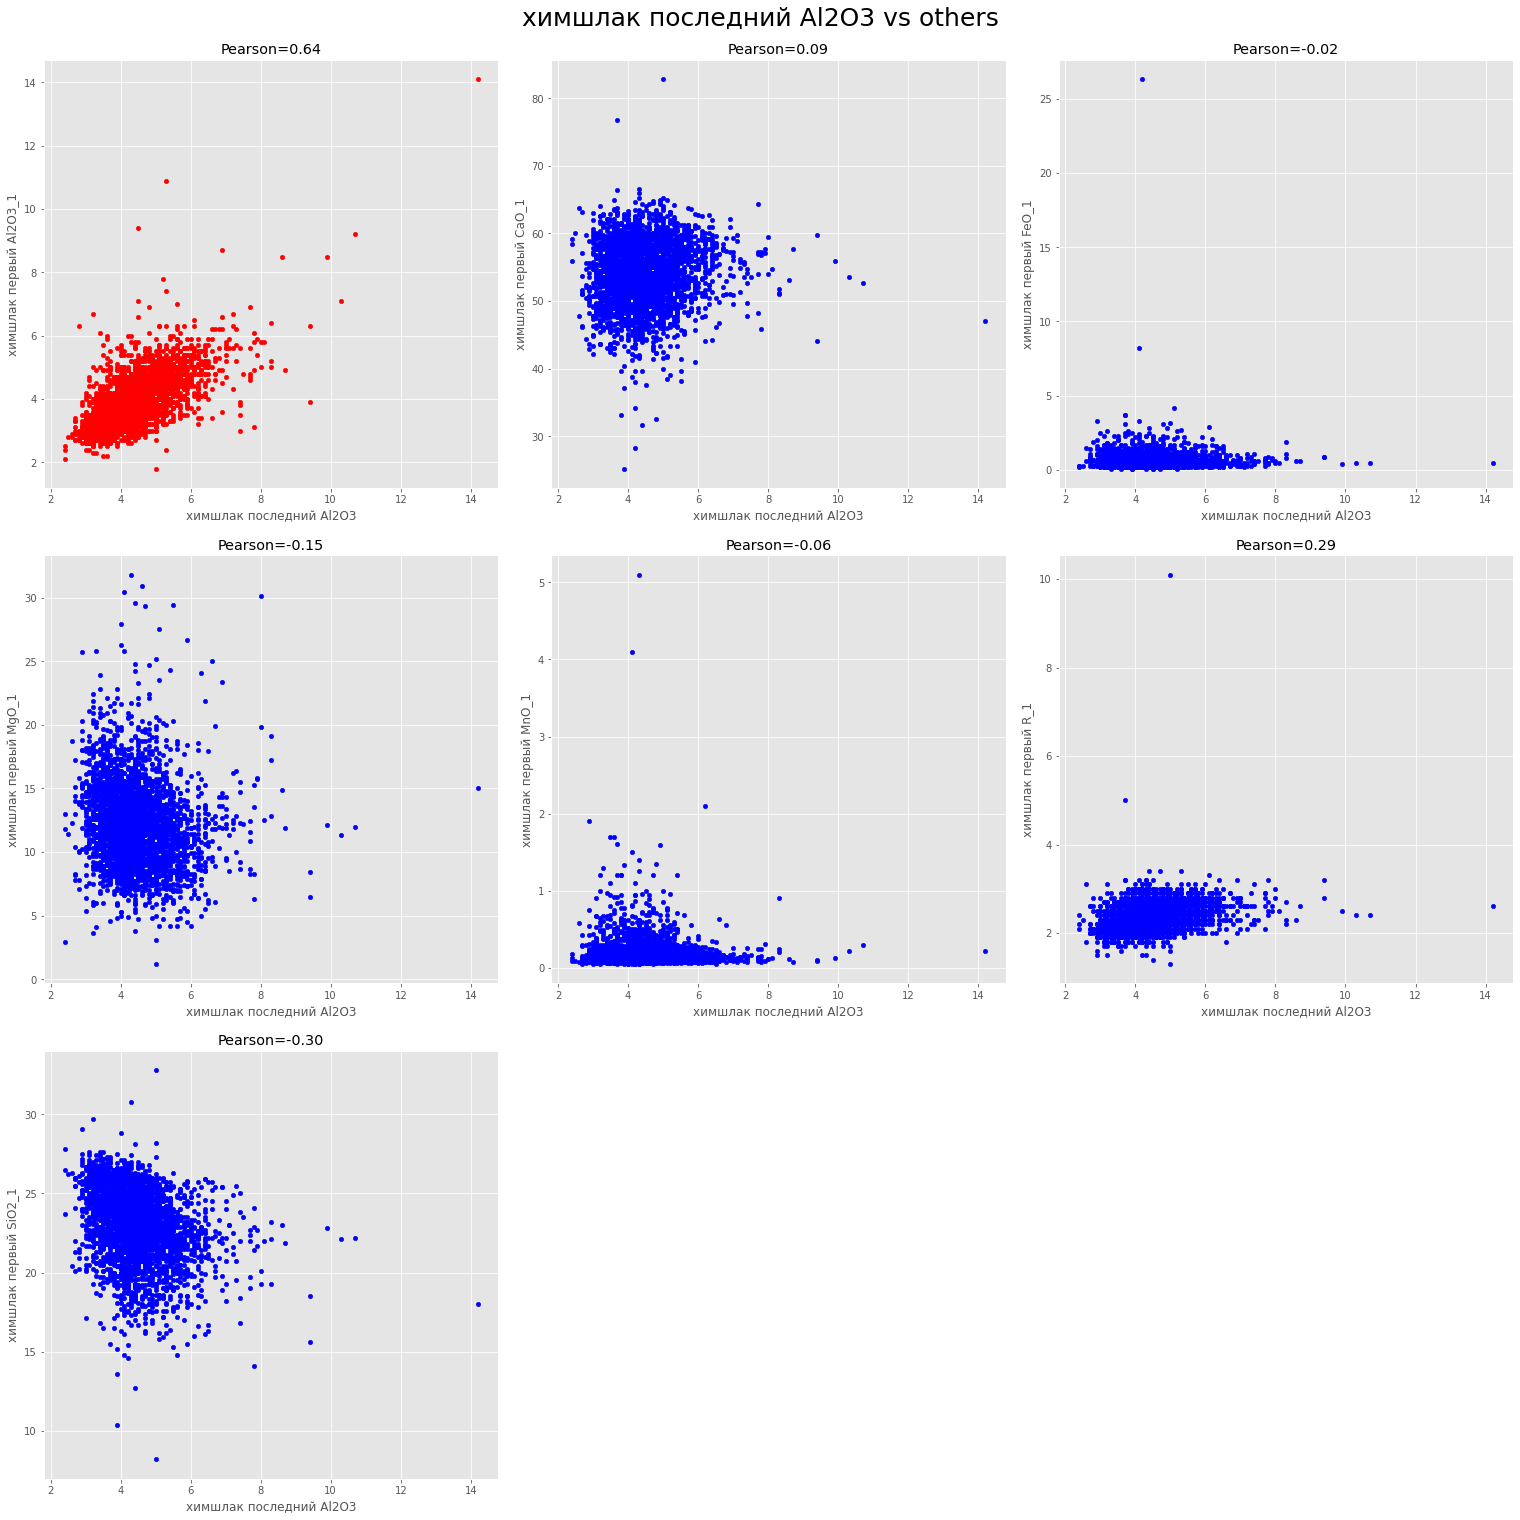

In [15]:
y_names = find_all_column_names_with_first_words('химшлак первый', df)
x_name = 'химшлак последний Al2O3'
plot_several_scatters_to_find_correlation(x_name, y_names, df)

# Простая регрессионная модель

In [8]:
x_cols = ['чист расход C',
          'чист расход Cr',
          'чист расход Mn',
          'чист расход Si',
          'чист расход V',
          'сыпуч известь РП',
          'сыпуч кокс пыль УСТК',
          'сыпуч  кокс. мелочь КМ1',
          'сыпуч  шпат плав.',
          'ферспл CaC2',
          'ферспл  FeV-80',
          'ферспл  Mn5Si65Al0.5',
          'ферспл SiMn18',
          'ферспл  фх850А'] +\
              find_all_column_names_with_first_words(format_string('химсталь первый'), df) +\
                  find_all_column_names_with_first_words(format_string('химсталь последний').replace(" ", "_"), df) +\
                      find_all_column_names_with_first_words(format_string('химшлак первый').replace(" ", "_"), df)

y_cols = ['химшлак последний Al2O3', 
          'химшлак последний CaO', 
          'химшлак последний FeO',
          'химшлак последний MgO',
          'химшлак последний MnO', 
          'химшлак последний R',
          'химшлак последний SiO2']

x_cols = [format_string(x) for x in x_cols]
y_cols = [format_string(x) for x in y_cols]

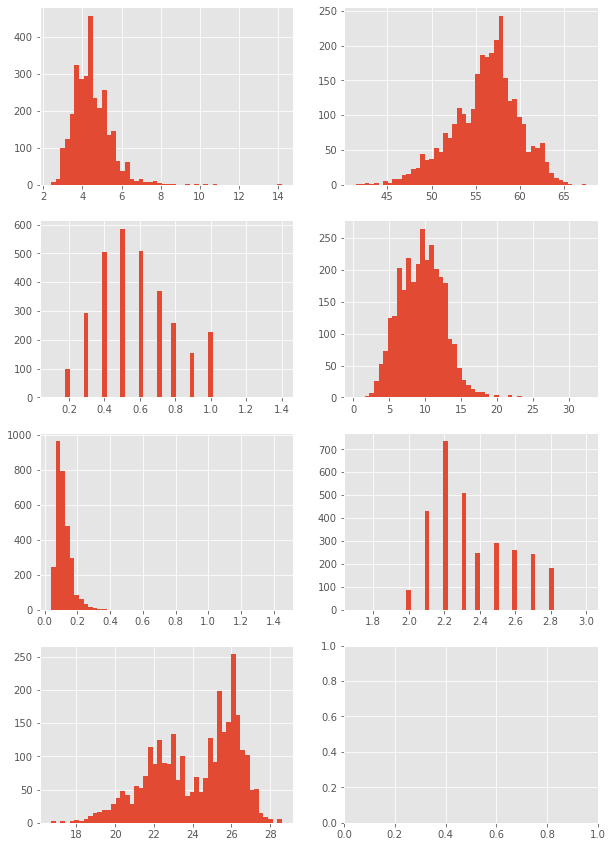

In [9]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 15))
axes = axes.flatten()
for y_col,ax in zip(y_cols, axes):
    df[y_col].hist(ax=ax, bins=50)

In [10]:
isfor = IsolationForest()
isfor.fit(df)
isfor_pred = isfor.predict(df)

df = df[isfor_pred==1]

print(df.shape)

(2918, 68)


# Begin

In [11]:
y_col = y_cols[0]
y_col

'химшлак_последний_Al_O_'

In [12]:
x, y = df.filter(x_cols), df.filter(y_cols)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [17]:
request = y_col + ' ~ '
for i, col_name in enumerate(x.columns):
    if not i == 0:
        request += ' + '
    request += col_name
request


'химшлак_последний_Al_O_ ~ чист_расход_C + чист_расход_Cr + чист_расход_Mn + чист_расход_Si + чист_расход_V + сыпуч_известь_РП + сыпуч_кокс_пыль_УСТК + сыпуч__кокс_мелочь_КМ_ + сыпуч__шпат_плав + ферспл_CaC_ + ферспл__FeV___ + ферспл__Mn_Si__Al__ + ферспл_SiMn__ + ферспл__фх___А + химсталь_первый_Al__ + химсталь_первый_C__ + химсталь_первый_Cr__ + химсталь_первый_Cu__ + химсталь_первый_Mn__ + химсталь_первый_Mo__ + химсталь_первый_N__ + химсталь_первый_Ni__ + химсталь_первый_P__ + химсталь_первый_S__ + химсталь_первый_Si__ + химсталь_первый_Ti__ + химсталь_первый_V__ + химсталь_последний_Al + химсталь_последний_C + химсталь_последний_Ca + химсталь_последний_Cr + химсталь_последний_Cu + химсталь_последний_Mn + химсталь_последний_Mo + химсталь_последний_N + химсталь_последний_Ni + химсталь_последний_P + химсталь_последний_S + химсталь_последний_Si + химсталь_последний_Ti + химсталь_последний_V + химшлак_первый_Al_O___ + химшлак_первый_CaO__ + химшлак_первый_FeO__ + химшлак_первый_MgO__ +

In [18]:
mod = smf.ols(request, data=df)
res = mod.fit()
print(res.summary())

                               OLS Regression Results                              
Dep. Variable:     химшлак_последний_Al_O_   R-squared:                       0.502
Model:                                 OLS   Adj. R-squared:                  0.493
Method:                      Least Squares   F-statistic:                     60.15
Date:                     Wed, 03 Feb 2021   Prob (F-statistic):               0.00
Time:                             01:20:21   Log-Likelihood:                -2842.3
No. Observations:                     2918   AIC:                             5783.
Df Residuals:                         2869   BIC:                             6076.
Df Model:                               48                                         
Covariance Type:                 nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

In [23]:
lr = LinearRegression(normalize=True)
lr.fit(X_train, y_train[y_col])

LinearRegression(normalize=True)

In [23]:
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True}

In [25]:
from scipy import stats
X, y = X_train, y_train[y_col]
lm = LinearRegression()
lm.fit(X,y)
params = np.append(lm.intercept_,lm.coef_)
predictions = lm.predict(X)

newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))
MSE = (sum((y-predictions)**2))/(len(newX)-len(newX.columns))

# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilities"] = [params,sd_b,ts_b,p_values]
print(myDF3)

KeyError: 0

In [17]:
X = df.filter(x_cols)
y = df.filter(y_cols)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [24]:
X_train

,чист расход C,чист расход Cr,чист расход Mn,чист расход Si,чист расход V,сыпуч известь РП,сыпуч кокс пыль УСТК,сыпуч кокс. мелочь КМ1,сыпуч шпат плав.,ферспл CaC2,...,химсталь последний Si,химсталь последний Ti,химсталь последний V,химшлак первый Al2O3_1,химшлак первый CaO_1,химшлак первый FeO_1,химшлак первый MgO_1,химшлак первый MnO_1,химшлак первый R_1,химшлак первый SiO2_1
2292,0.387275,0.101016,0.099768,0.141432,0.039170,0.205,0.05,0.412,0.029,0.02,...,0.521,0.003,0.036,4.3,58.5,0.3,6.6,0.05,2.5,23.0
73,0.594195,0.088881,0.207271,0.102520,0.092096,0.077,0.05,0.666,0.052,0.02,...,0.532,0.003,0.084,4.3,55.5,1.5,13.4,0.21,2.5,22.2
1844,0.399960,0.141824,0.148922,0.177396,0.039920,0.160,0.05,0.418,0.064,0.02,...,0.561,0.003,0.036,3.9,45.9,0.7,13.7,0.12,2.2,20.9
1706,0.303465,0.150588,0.113661,0.121496,0.039048,0.094,0.05,0.299,0.039,0.02,...,0.566,0.003,0.037,3.8,49.2,0.6,8.1,0.09,2.9,17.2
1710,0.355120,0.142128,0.123237,0.155782,0.040716,0.084,0.05,0.364,0.040,0.02,...,0.564,0.003,0.037,3.8,57.2,1.1,7.0,0.08,3.0,19.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,0.422190,0.102466,0.129047,0.158967,0.040929,0.197,0.05,0.454,0.043,0.02,...,0.568,0.003,0.038,3.7,57.6,0.2,12.5,0.21,2.2,25.7
1095,0.295770,0.087626,0.046980,0.104175,0.038791,0.105,0.05,0.304,0.040,0.02,...,0.559,0.003,0.035,3.8,60.4,0.5,8.7,0.07,2.9,20.7
1130,0.321150,0.125180,0.081861,0.089628,0.040054,0.080,0.05,0.327,0.051,0.02,...,0.555,0.003,0.036,4.0,60.8,0.4,8.3,0.10,2.6,23.5
1294,0.375010,0.107350,0.150914,0.155144,0.039596,0.138,0.05,0.394,0.069,0.02,...,0.572,0.003,0.039,3.8,55.2,0.5,10.9,0.09,2.3,24.0


In [20]:
def rmse(predicted, actual):
    return ((predicted - actual)**2).mean()**.5

In [107]:
for y_col in y_cols:
    lr = LinearRegression()
    lr.fit(X_train, y_train[y_col])
    y_pred = lr.predict(X_test)
    print(f'{y_col}\t'
          f'{rmse(y_pred, y_test[y_col])}\t'
          f'{r2_score(y_test[y_col], y_pred)}')

химшлак последний Al2O3	0.6280837019375336	0.5219145954019557
химшлак последний CaO	3.369593615456142	0.2639209094450403
химшлак последний FeO	0.2118374537352776	0.02561710588456101
химшлак последний MgO	2.5009088339426637	0.3901057373776815
химшлак последний MnO	0.03832753020836649	0.2357891019648457
химшлак последний R	0.17344124733602767	0.3792031491203882
химшлак последний SiO2	1.9464524826543463	0.22550365611291612


In [23]:
for y_col in y_cols:
    rf = RandomForestRegressor()
    rf.fit(X_train, y_train[y_col])
    y_pred = rf.predict(X_test)
    print(f'{y_col}\t'
          f'{rmse(y_pred, y_test[y_col])}\t'
          f'{r2_score(y_test[y_col], y_pred)}')

химшлак последний Al2O3	0.6285326812468457	0.52123084202818
химшлак последний CaO	3.401630142726714	0.24985777831841183
химшлак последний FeO	0.21048748197088868	0.03799639099654417
химшлак последний MgO	2.513023688666835	0.3841825493089712
химшлак последний MnO	0.03944061308008395	0.19075714842682345
химшлак последний R	0.17188698674601438	0.39027960065964606
химшлак последний SiO2	1.9746834039508727	0.2028744819941618


In [40]:
import pandas as pd

fi_ = rf.feature_importances_
feature_scores = pd.DataFrame({"feature": X_train.columns, "importance": fi_})

feature_scores.sort_values("importance", ascending=False).head(20)

,feature,importance
46,химшлак первый R_1,0.154237
47,химшлак первый SiO2_1,0.047083
5,сыпуч известь РП,0.035404
15,химсталь первый C_1,0.033935
44,химшлак первый MgO_1,0.033241
41,химшлак первый Al2O3_1,0.033014
42,химшлак первый CaO_1,0.030791
8,сыпуч шпат плав.,0.029263
38,химсталь последний Si,0.028994
3,чист расход Si,0.027300
